In [ ]:
import sys
!{sys.executable} -m pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sqlite3
import pandas as pd

# create a database connection
conn = sqlite3.connect('healthcare.db')

In [ ]:
# create the tables in the database
cursor = conn.cursor()

In [ ]:
## only when you wanna delete all the files and start clean 
!rm *.zip*
!rm *.csv


rm: cannot remove '*.zip*': No such file or directory
rm: cannot remove '*.csv': No such file or directory


In [ ]:
##benefits.csv downloading from source if needed
!wget https://download.cms.gov/marketplace-puf/2023/benefits-and-cost-sharing-puf.zip
!unzip benefits-and-cost-sharing-puf.zip
!mv Benefits_Cost_Sharing_PUF.csv benefits.csv




--2023-04-20 22:20:41--  https://download.cms.gov/marketplace-puf/2023/benefits-and-cost-sharing-puf.zip
Resolving download.cms.gov (download.cms.gov)... 23.73.254.125, 2600:1408:c400:1291::28a, 2600:1408:c400:128d::28a
Connecting to download.cms.gov (download.cms.gov)|23.73.254.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28863127 (28M) [application/zip]
Saving to: ‘benefits-and-cost-sharing-puf.zip’

benefits-and-cost-s 100%[===================>]  27.53M  42.5MB/s    in 0.6s    

2023-04-20 22:20:41 (42.5 MB/s) - ‘benefits-and-cost-sharing-puf.zip’ saved [28863127/28863127]

Archive:  benefits-and-cost-sharing-puf.zip
  inflating: Benefits_Cost_Sharing_PUF.csv  


In [ ]:
##plans.csv downloading from source if needed
!wget https://download.cms.gov/marketplace-puf/2023/plan-attributes-puf.zip
!unzip plan-attributes-puf.zip
!mv Plan_Attributes_PUF.csv plans.csv

--2023-04-20 22:21:00--  https://download.cms.gov/marketplace-puf/2023/plan-attributes-puf.zip
Resolving download.cms.gov (download.cms.gov)... 23.73.254.125, 2600:1408:c400:1291::28a, 2600:1408:c400:128d::28a
Connecting to download.cms.gov (download.cms.gov)|23.73.254.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1599812 (1.5M) [application/zip]
Saving to: ‘plan-attributes-puf.zip’

plan-attributes-puf 100%[===================>]   1.53M  --.-KB/s    in 0.07s   

2023-04-20 22:21:00 (21.5 MB/s) - ‘plan-attributes-puf.zip’ saved [1599812/1599812]

Archive:  plan-attributes-puf.zip
  inflating: Plan_Attributes_PUF.csv  


In [ ]:
##rates.csv downloading from source if needed
!wget https://download.cms.gov/marketplace-puf/2023/rate-puf.zip
!unzip rate-puf.zip
!mv Rate_PUF.csv rates.csv

--2023-04-20 22:21:09--  https://download.cms.gov/marketplace-puf/2023/rate-puf.zip
Resolving download.cms.gov (download.cms.gov)... 23.73.254.125, 2600:1408:c400:128d::28a, 2600:1408:c400:1291::28a
Connecting to download.cms.gov (download.cms.gov)|23.73.254.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22938126 (22M) [application/zip]
Saving to: ‘rate-puf.zip’

rate-puf.zip        100%[===================>]  21.88M   104MB/s    in 0.2s    

2023-04-20 22:21:09 (104 MB/s) - ‘rate-puf.zip’ saved [22938126/22938126]

Archive:  rate-puf.zip
  inflating: Rate_PUF.csv            


In [ ]:
# read the CSV files into pandas dataframes
benefit_df = pd.read_csv('benefits.csv')
plans_df = pd.read_csv('plans.csv')
rates_df = pd.read_csv('rates.csv')

<ipython-input-7-6ac016f87dd3>:2: DtypeWarning: Columns (9,12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  benefit_df = pd.read_csv('benefits.csv')
<ipython-input-7-6ac016f87dd3>:3: DtypeWarning: Columns (27,64,80,81,82,86,87,88,89,90,91,111,122,123,124,125,147,148) have mixed types. Specify dtype option on import or set low_memory=False.
  plans_df = pd.read_csv('plans.csv')


In [ ]:
benefit_df

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,...,IsEHB,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP
0,2023,AK,21989,HIOS,2022-11-19 01:01:13,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,NaN,...,NaN,Covered,Yes,1100.0,Dollars per Year,NaN,"$1,100 annual maximum plan payment limit combi...",Not EHB,Yes,Yes
1,2023,AK,21989,HIOS,2022-11-19 01:01:13,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,See policy for additional limitations,Substantially Equal,No,No
2,2023,AK,21989,HIOS,2022-11-19 01:01:13,21989AK0030001,21989AK0030001-00,Basic Dental Care - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,NaN,NaN,No,No
3,2023,AK,21989,HIOS,2022-11-19 01:01:13,21989AK0030001,21989AK0030001-00,Orthodontia - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,Only medically necessary orthodontia is covered,Substantially Equal,No,No
4,2023,AK,21989,HIOS,2022-11-19 01:01:13,21989AK0030001,21989AK0030001-00,Major Dental Care - Child,Not Applicable,NaN,...,Yes,Covered,NaN,NaN,NaN,NaN,NaN,NaN,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219411,2023,WV,94562,SERFF,2022-08-12 20:01:04,94562WV0080001,94562WV0080001-00,Major Dental Care - Child,Not Applicable,NaN,...,Yes,Covered,Yes,1.0,Treatment(s) per Procedure,NaN,NaN,Substantially Equal,No,Yes
2219412,2023,WV,94562,SERFF,2022-08-12 20:01:04,94562WV0080001,94562WV0080001-00,Basic Dental Care - Adult,NaN,NaN,...,NaN,Not Covered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2219413,2023,WV,94562,SERFF,2022-08-12 20:01:04,94562WV0080001,94562WV0080001-00,Orthodontia - Adult,NaN,NaN,...,NaN,Not Covered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2219414,2023,WV,94562,SERFF,2022-08-12 20:01:04,94562WV0080001,94562WV0080001-00,Major Dental Care - Adult,NaN,NaN,...,NaN,Not Covered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter By 10 Most Populous States and Drop Unnecessary Columns
top10USStatesByPopulation = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']

In [ ]:
benefit_df = benefit_df[benefit_df['StateCode'].isin(top10USStatesByPopulation)]

<Axes: >

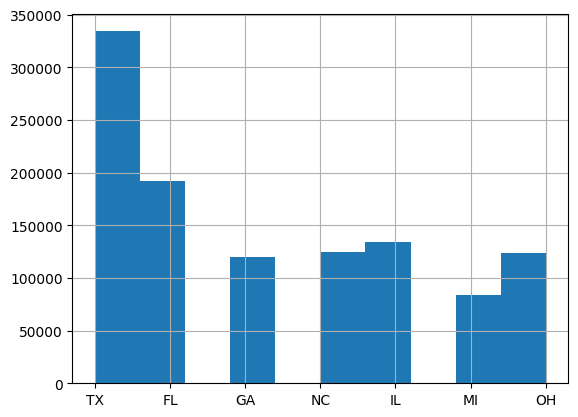

In [ ]:
benefit_df['StateCode'].hist()

In [ ]:
plans_df

,BusinessYear,StateCode,IssuerId,IssuerMarketPlaceMarketingName,SourceName,ImportDate,MarketCoverage,DentalOnlyPlan,StandardComponentId,PlanMarketingName,...,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutOfNetFamilyPerGroup,TEHBDedCombInnOonIndividual,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonFamilyPerGroup,IsHSAEligible,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,URLForSummaryofBenefitsCoverage,PlanBrochure
0,2023,AK,21989,Delta Dental of Alaska,HIOS,11/19/2022 1:01,Individual,Yes,21989AK0030001,Delta Dental Premier Plan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,https://www.deltadentalak.com/-/media/deltaden...
1,2023,AK,21989,Delta Dental of Alaska,HIOS,11/19/2022 1:01,Individual,Yes,21989AK0030001,Delta Dental Premier Plan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,https://www.deltadentalak.com/-/media/deltaden...
2,2023,AK,21989,Delta Dental of Alaska,HIOS,11/19/2022 1:01,SHOP (Small Group),Yes,21989AK0030051,"Delta Dental Premier, +1500, 100*/80/50, 50, PF",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,https://www.deltadentalak.com/-/media/deltaden...
3,2023,AK,21989,Delta Dental of Alaska,HIOS,11/19/2022 1:01,SHOP (Small Group),Yes,21989AK0030052,"Delta Dental Premier, +1000, 100*/80/50, 50, PF",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,https://www.deltadentalak.com/-/media/deltaden...
4,2023,AK,21989,Delta Dental of Alaska,HIOS,11/19/2022 1:01,SHOP (Small Group),Yes,21989AK0040051,PPO Plus 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,https://www.deltadentalak.com/-/media/deltaden...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32523,2023,WY,80132,Renaissance Dental,HIOS,6/16/2022 1:01,Individual,Yes,80132WY0060004,Wyoming Preferred Plan (Pediatric Only),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
32524,2023,WY,83964,Delta Dental of Wyoming,HIOS,6/16/2022 1:01,Individual,Yes,83964WY0010003,Delta Dental Individual and Family Low Plan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
32525,2023,WY,83964,Delta Dental of Wyoming,HIOS,6/16/2022 1:01,Individual,Yes,83964WY0010004,Delta Dental Individual & Family High Plan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
32526,2023,WY,83964,Delta Dental of Wyoming,HIOS,6/16/2022 1:01,SHOP (Small Group),Yes,83964WY0020003,Delta Dental Small Group Low Plan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


In [ ]:
rates_df

,BusinessYear,StateCode,IssuerId,SourceName,ImportDate,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2023,AK,21989,HIOS,2022-11-19 01:01:13,2023-10-01,2023-12-31,21989AK0110001,Rating Area 1,NaN,Family Option,76.59,NaN,159.30,183.81,183.81,183.81,274.18,274.18,274.18
1,2023,AK,21989,HIOS,2022-11-19 01:01:13,2023-01-01,2023-12-31,21989AK0030001,Rating Area 1,No Preference,0-14,63.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,AK,21989,HIOS,2022-11-19 01:01:13,2023-01-01,2023-03-31,21989AK0110001,Rating Area 1,NaN,Family Option,73.82,NaN,153.54,177.16,177.16,177.16,264.27,264.27,264.27
3,2023,AK,21989,HIOS,2022-11-19 01:01:13,2023-04-01,2023-06-30,21989AK0110001,Rating Area 1,NaN,Family Option,74.74,NaN,155.46,179.38,179.38,179.38,267.57,267.57,267.57
4,2023,AK,21989,HIOS,2022-11-19 01:01:13,2023-07-01,2023-09-30,21989AK0110001,Rating Area 1,NaN,Family Option,75.66,NaN,157.38,181.59,181.59,181.59,270.87,270.87,270.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752436,2023,WV,94562,SERFF,2022-08-12 20:01:04,2023-10-01,2023-12-31,94562WV0080001,Rating Area 11,No Preference,63,1063.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2752437,2023,WV,94562,SERFF,2022-08-12 20:01:04,2023-10-01,2023-12-31,94562WV0080001,Rating Area 11,No Preference,64 and over,1064.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2752438,2023,WV,94562,SERFF,2022-08-12 20:01:04,2023-04-01,2023-06-30,94562WV0080001,Rating Area 11,No Preference,64 and over,1064.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2752439,2023,WV,94562,SERFF,2022-08-12 20:01:04,2023-07-01,2023-09-30,94562WV0080001,Rating Area 11,No Preference,64 and over,1064.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# missing states = CA, NY, PA
benefit_df = benefit_df[benefit_df['StateCode'].isin(top10USStatesByPopulation)]
plans_df = plans_df[plans_df['StateCode'].isin(top10USStatesByPopulation)]
rates_df = rates_df[rates_df['StateCode'].isin(top10USStatesByPopulation)]

rates_df_filtered = rates_df.drop(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'ImportDate', 'RateEffectiveDate', 'RateExpirationDate', 'RatingAreaId'], axis=1)
plans_df_filtered = plans_df.drop(['BusinessYear', 'IssuerId', 'SourceName', 'ImportDate', 'PlanBrochure', 'URLForSummaryofBenefitsCoverage', 'HSAOrHRAEmployerContribution', 'HSAOrHRAEmployerContributionAmount', 'InpatientCopaymentMaximumDays', 'NationalNetwork', 'OutOfCountryCoverageDescription', 'OutOfServiceAreaCoverage', 'EHBPediatricDentalApportionmentQuantity', 'DesignType', 'MetalLevel'], axis=1)
benefit_df_filtered = benefit_df.drop(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'ImportDate', 'StandardComponentId', 'CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet', 'CoinsInnTier1', 'CoinsInnTier2', 'CoinsOutofNet', 'Exclusions', 'Explanation', 'EHBVarReason', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP'], axis=1)

In [ ]:
# insert the data into the database
rates_df_filtered.to_sql('Rates', conn, if_exists='replace', index=False)
plans_df_filtered.to_sql('Plan', conn, if_exists='replace', index=False)
benefit_df_filtered.to_sql('Benefit', conn, if_exists='replace', index=False)

1113553